<a href="https://colab.research.google.com/github/Tommy840602/NLP/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-8-f4bb1691bd76>, line 6)

In [2]:
us_df=pd.read_csv("/content/USvideos.csv")
ca_df=pd.read_csv("/content/CAvideos.csv")
de_df=pd.read_csv("/content/DEvideos.csv")
fr_df=pd.read_csv("/content/FRvideos.csv")
gb_df=pd.read_csv("/content/GBvideos.csv")

In [3]:
#Unix datetime format.
us_df['trending_date'] = pd.to_datetime(us_df['trending_date'], format='%y.%d.%m')
us_df['publish_time'] = pd.to_datetime(us_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

us_df.insert(4, 'publish_date', us_df['publish_time'].dt.date)
us_df['publish_time'] = us_df['publish_time'].dt.time
us_df['publish_date']=pd.to_datetime(us_df['publish_date'])

<Axes: >

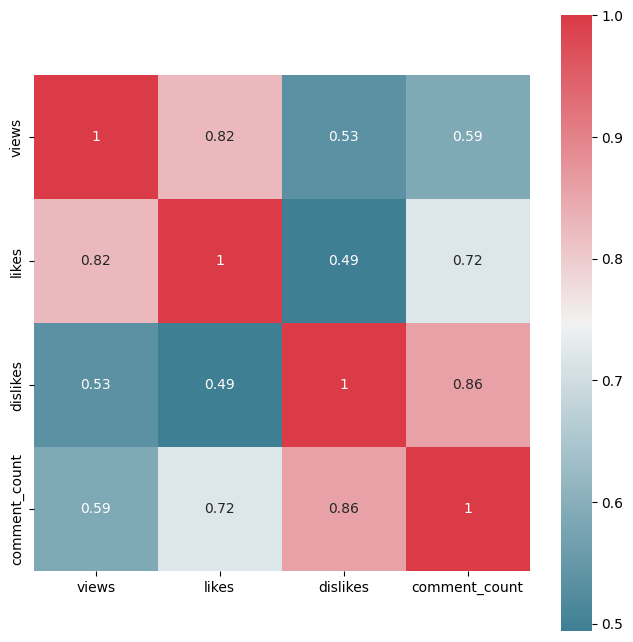

In [10]:
#correlation
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = us_df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)

In [11]:
us_video_views=us_df.groupby(['video_id'])['views'].agg('sum')
us_video_likes=us_df.groupby(['video_id'])['likes'].agg('sum')
us_video_dislikes=us_df.groupby(['video_id'])['dislikes'].agg('sum')
us_video_comment_count=us_df.groupby(['video_id'])['comment_count'].agg('sum')

In [13]:
us_df_single_day_trend=us_df.drop_duplicates(subset='video_id', keep=False, inplace=False)
us_df_multiple_day_trend=us_df.drop_duplicates(subset='video_id',keep='first',inplace=False)

frames = [us_df_single_day_trend,us_df_multiple_day_trend]
us_df_without_duplicates=pd.concat(frames)

us_df_comment_disabled=us_df_without_duplicates[us_df_without_duplicates['comments_disabled']==True].describe()
us_df_rating_disabled=us_df_without_duplicates[us_df_without_duplicates['ratings_disabled']==True].describe()
us_df_video_error=us_df_without_duplicates[us_df_without_duplicates['video_error_or_removed']==True].describe()

In [15]:
us_df_single_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [16]:
us_df_multiple_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Text(0.5, 1.0, 'Top 5 Videos that trended maximum days in USA')

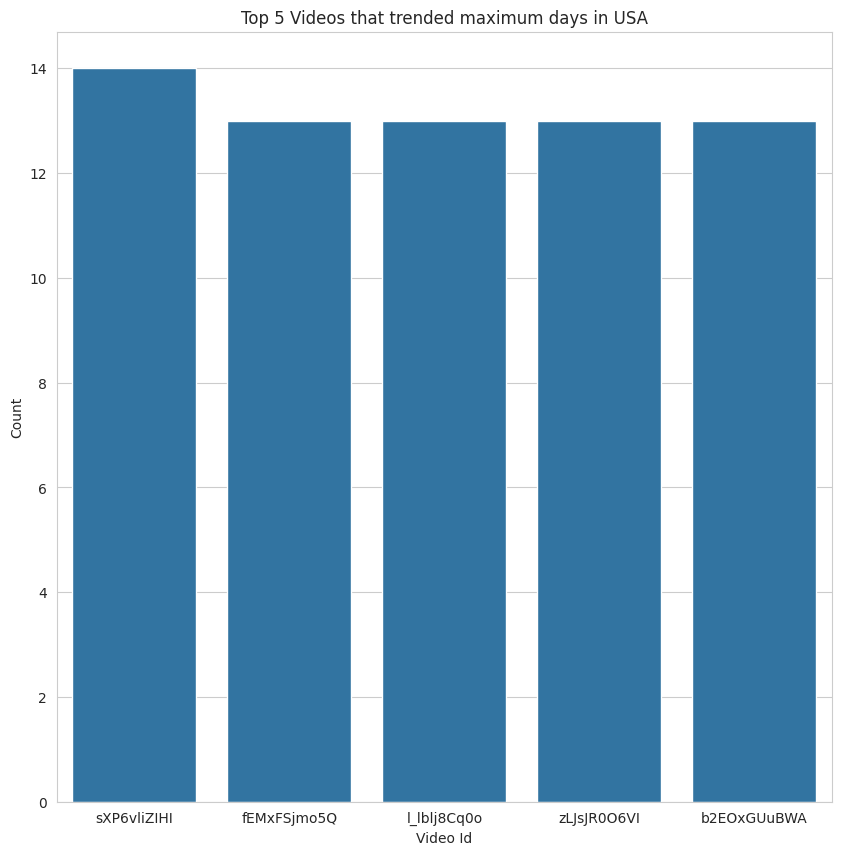

In [55]:
us_df_which_video_trended_maximum_days=us_df.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(us_df_which_video_trended_maximum_days,x=us_df_which_video_trended_maximum_days['video_id'],y=us_df_which_video_trended_maximum_days['trending_date'])
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

In [23]:
us_df_maximum_views=us_video_views['sXP6vliZIHI']
us_df_maximum_likes=us_video_likes['sXP6vliZIHI']
us_df_maximum_dislikes=us_video_dislikes['sXP6vliZIHI']
us_df_maximum_comment=us_video_comment_count['sXP6vliZIHI']

<ipython-input-24-7e5b46258abc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df_multiple_day_trend['Days_taken_to_be_trending_video'] =us_df_multiple_day_trend['trending_date'] - us_df_multiple_day_trend['publish_date']
<ipython-input-24-7e5b46258abc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df_multiple_day_trend['Days_taken_to_be_trending_video']= us_df_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')


Text(0.5, 1.0, 'Maximum no of days taken by 5 videos to be popular in USA')

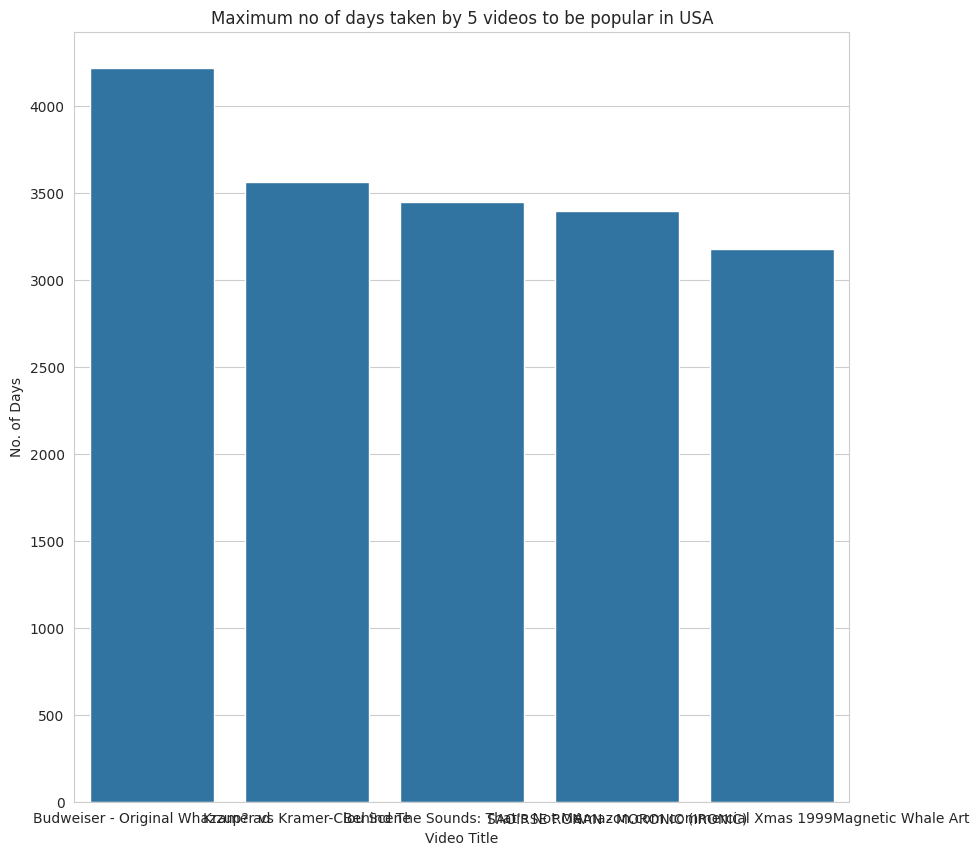

In [24]:
us_df_multiple_day_trend['Days_taken_to_be_trending_video'] =us_df_multiple_day_trend['trending_date'] - us_df_multiple_day_trend['publish_date']
us_df_multiple_day_trend['Days_taken_to_be_trending_video']= us_df_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')
us_no_of_days_take_trend=us_df_multiple_day_trend.sort_values(by='Days_taken_to_be_trending_video',ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=us_no_of_days_take_trend['title'],y=us_no_of_days_take_trend['Days_taken_to_be_trending_video'], data=us_no_of_days_take_trend)
plt.xlabel("Video Title")
plt.ylabel("No. of Days")
plt.title("Maximum no of days taken by 5 videos to be popular in USA")

Text(0.5, 1.0, 'Top 5 Trending Channel in USA')

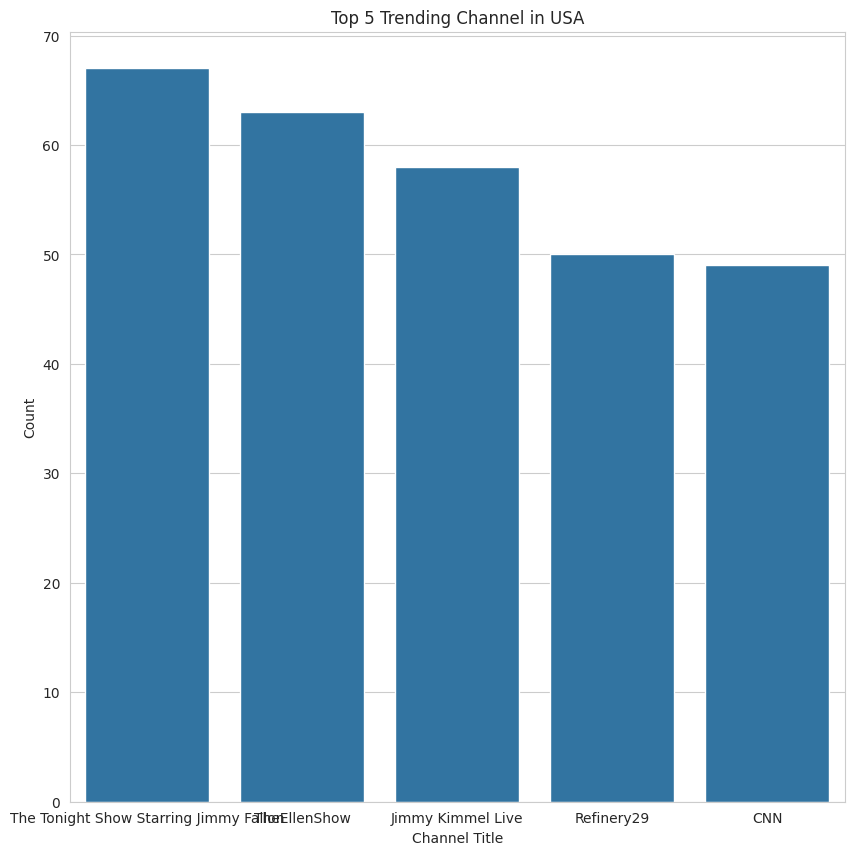

In [25]:
#Top 5 Trending Channel in USA
us_trending_channel=us_df_without_duplicates.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=us_trending_channel['channel_title'],y=us_trending_channel['video_id'], data=us_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in USA")

Text(0.5, 1.0, 'Top 5 Category IDs for USA')

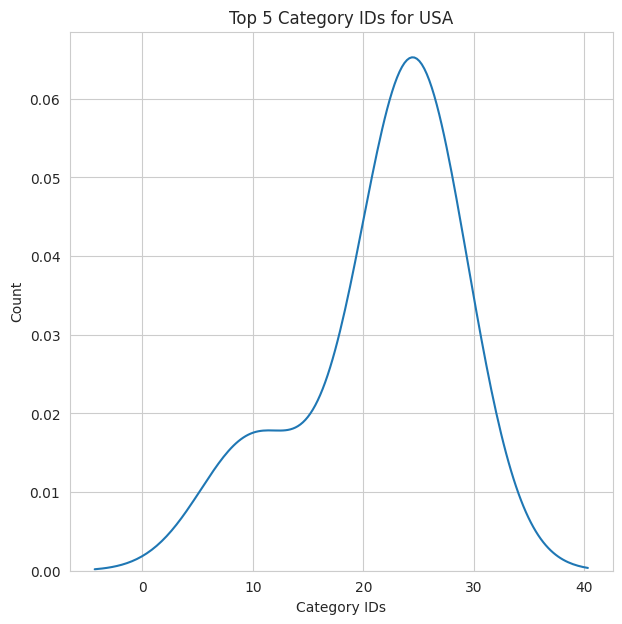

In [27]:
#Top 5 USA_Category_IDs
us_category_id=us_df_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(us_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for USA")

In [28]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


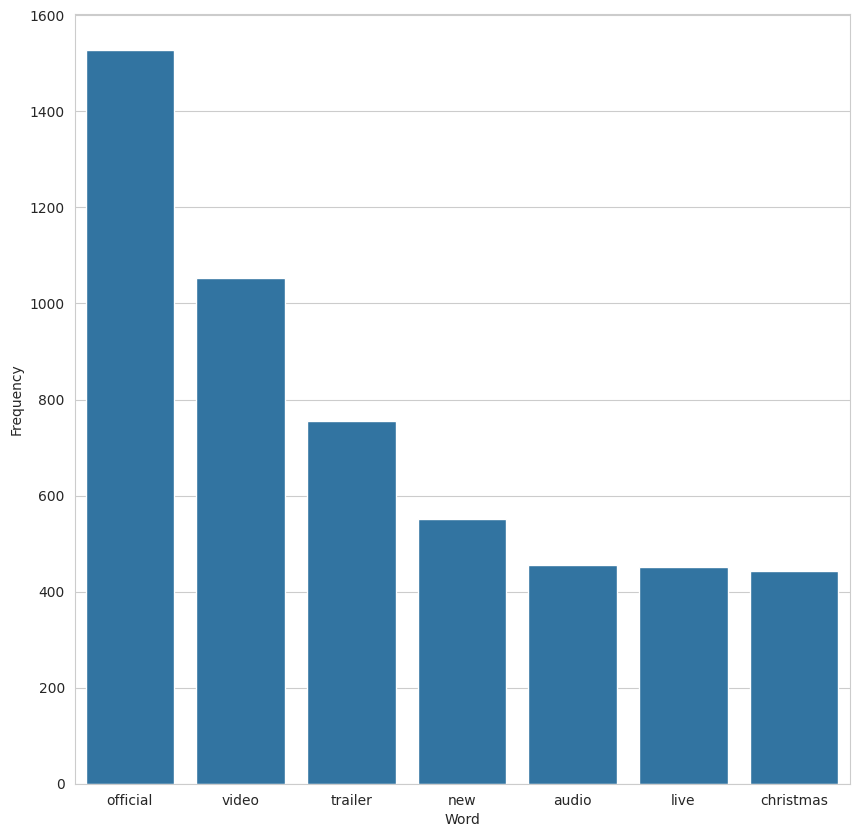

In [33]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
!pip install stop_words
from stop_words import get_stop_words
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

top_N = 100

a = us_df['title'].str.lower().str.cat(sep=' ')
b = re.sub('[^A-Za-z]+', ' ', a)

stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

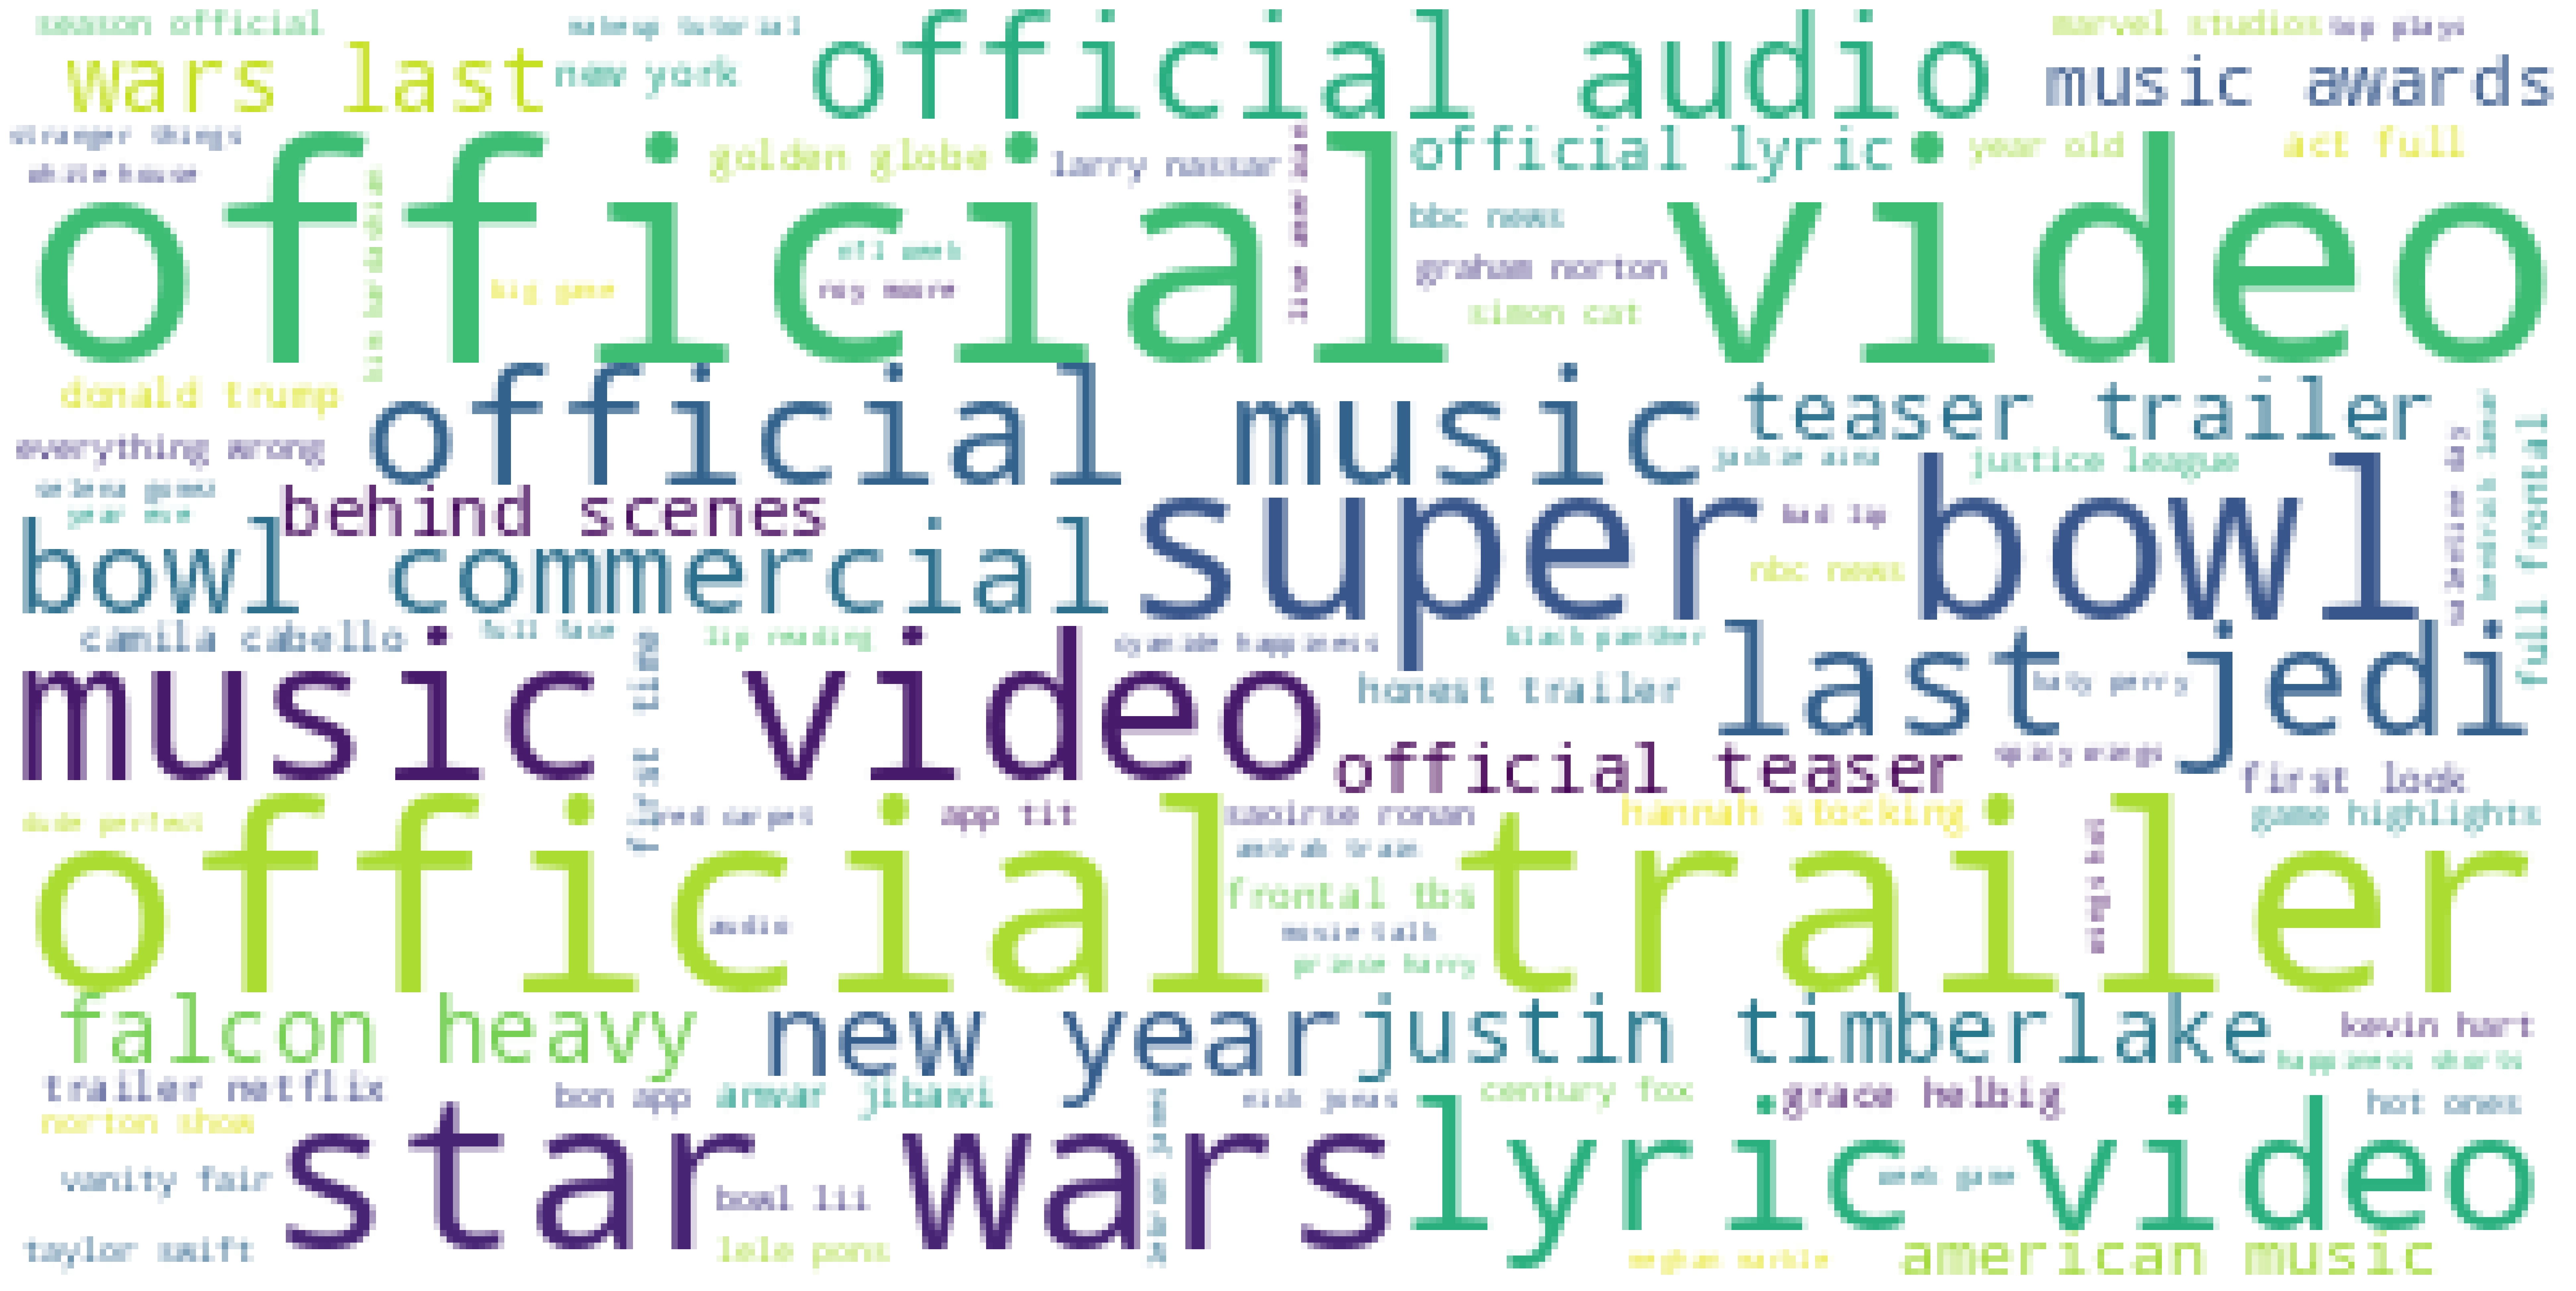

In [37]:
#WordCloud for Title Column
wc(cleaned_data_title,'white','Common Words')

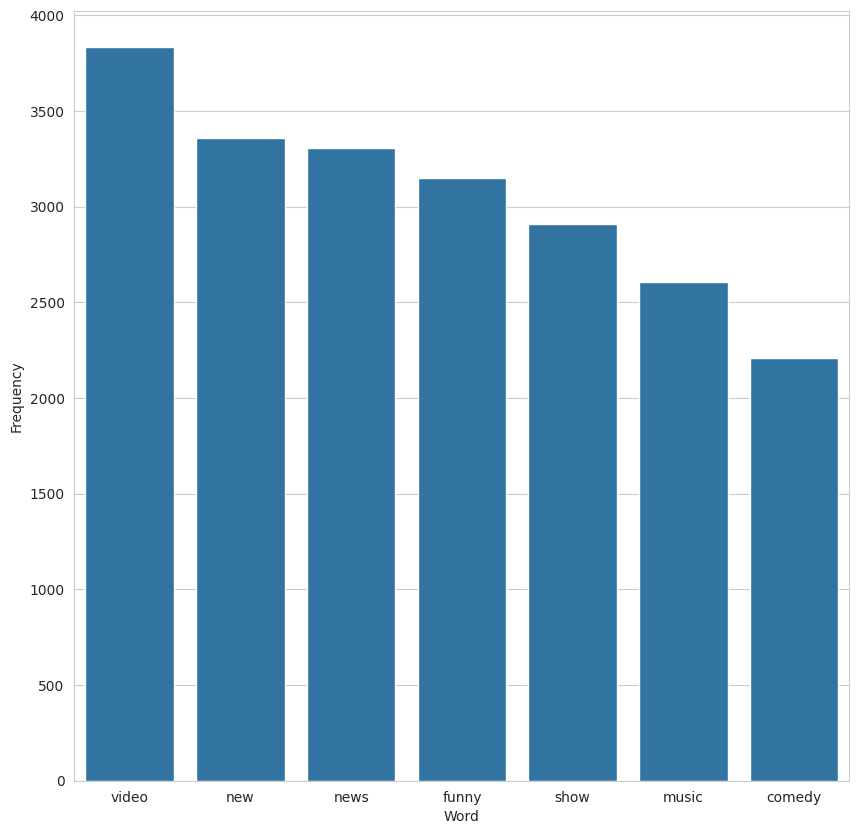

In [35]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

tags_lower = us_df['tags'].str.lower().str.cat(sep=' ')

tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]

word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

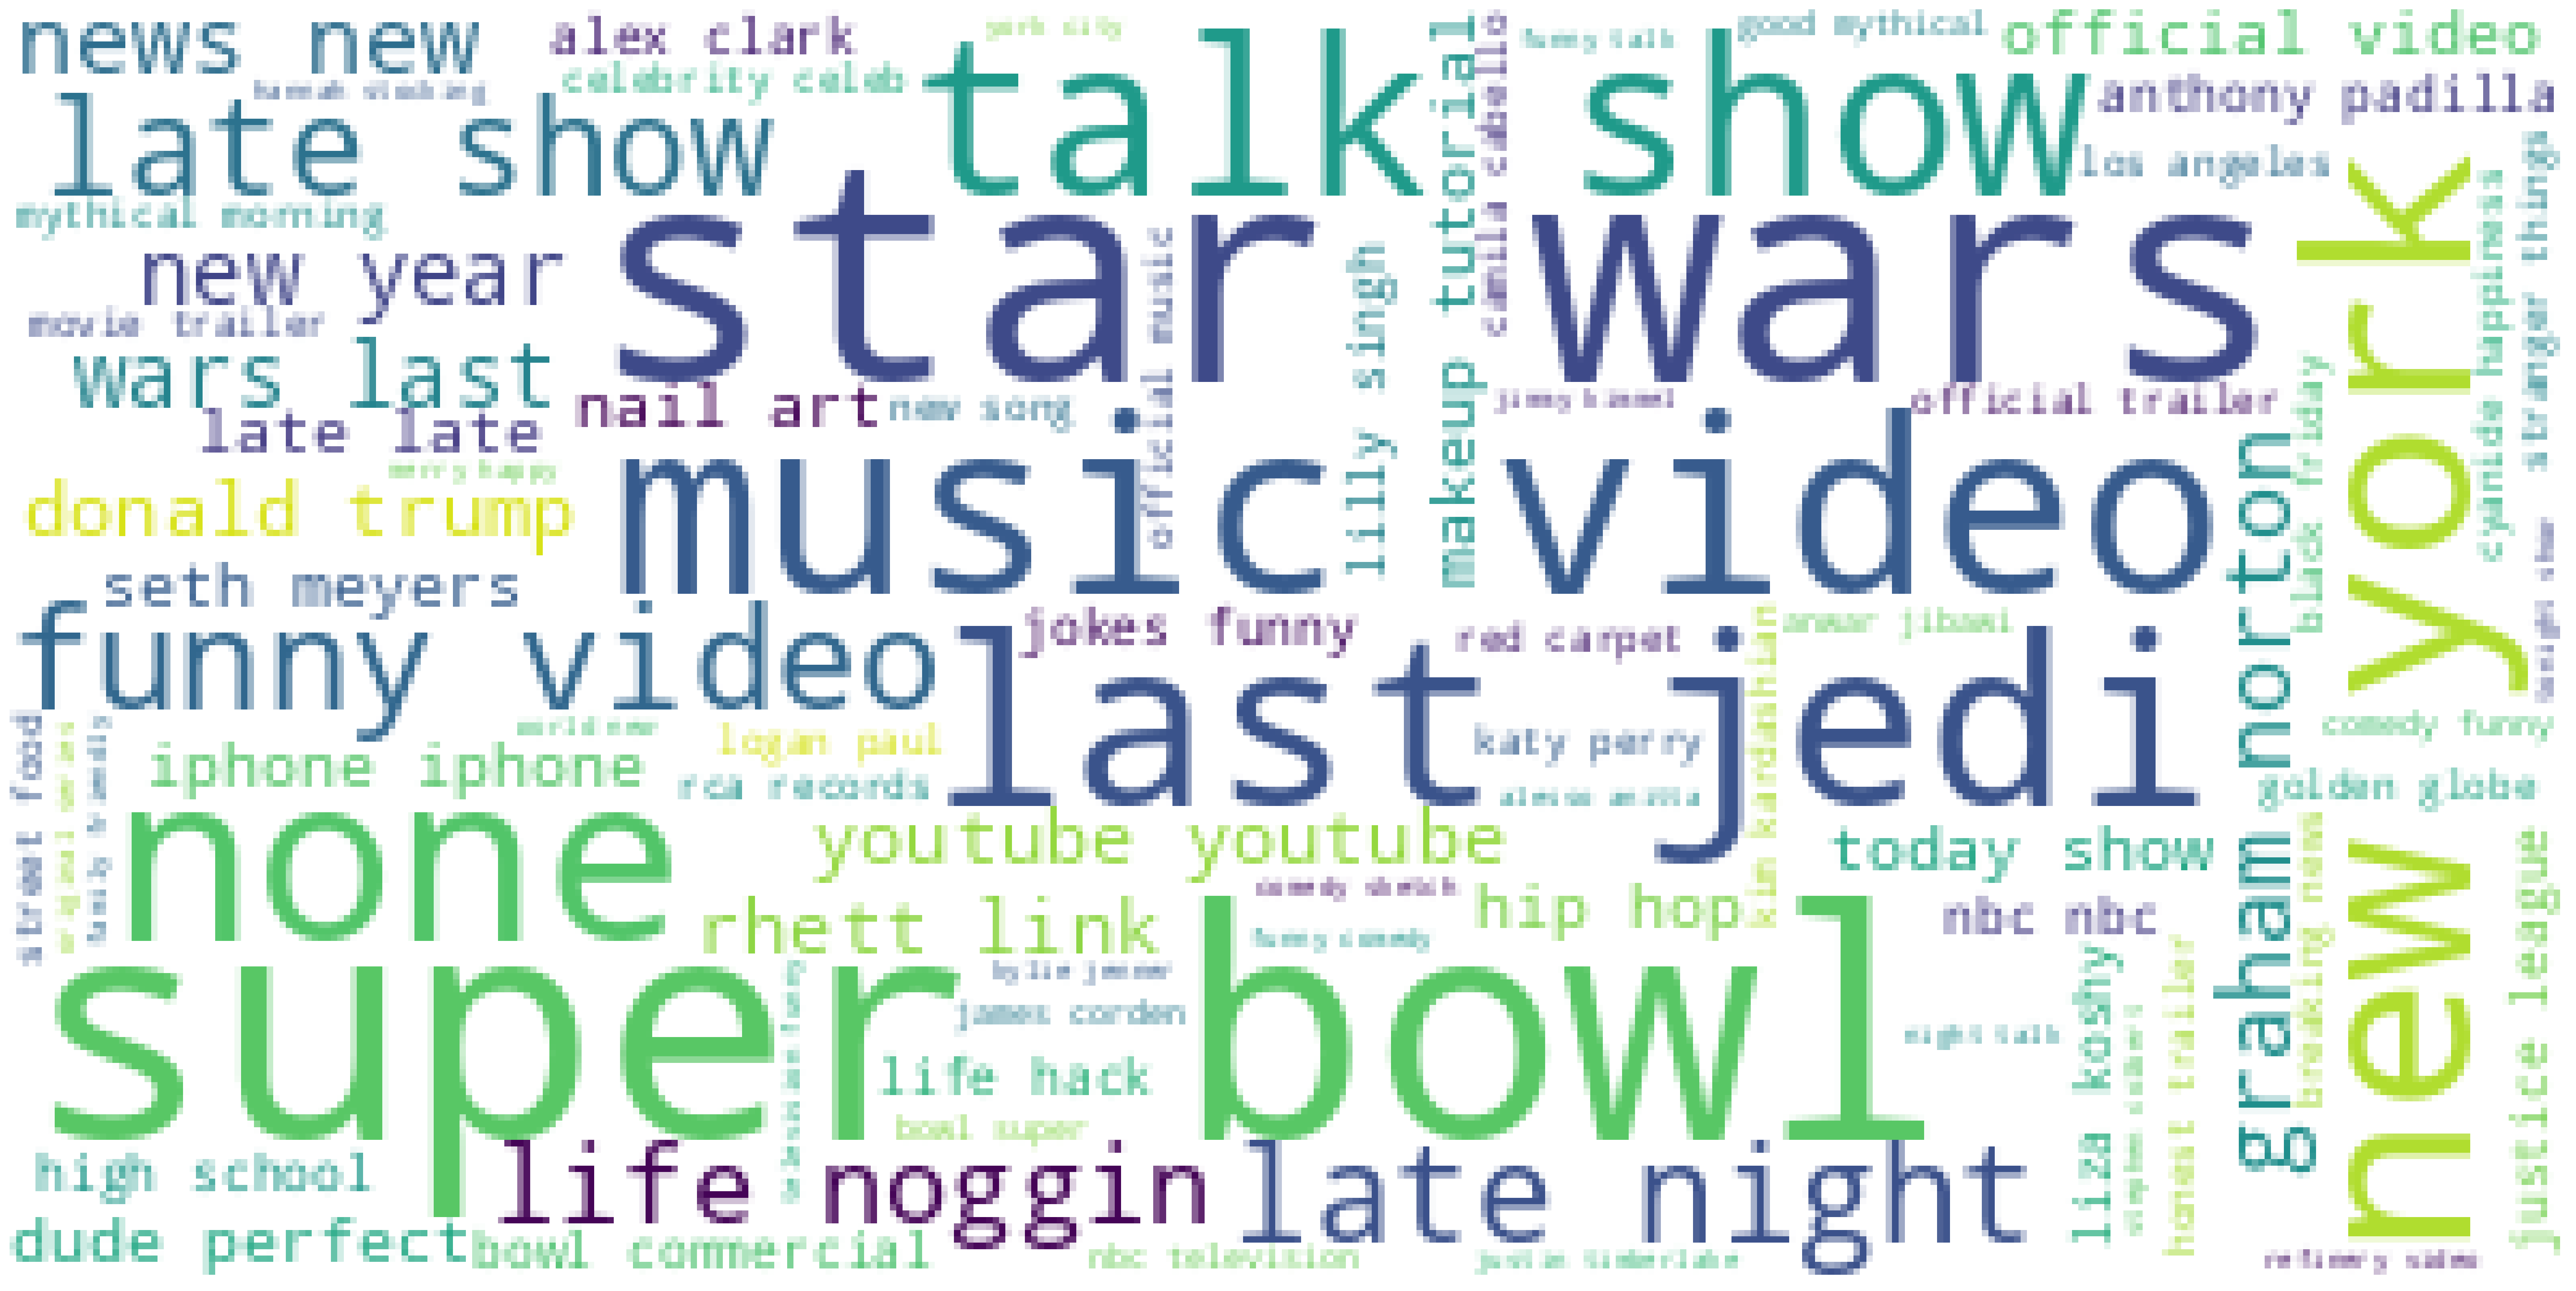

In [36]:
#WordCloud for Tags
wc(cleaned_data_tags,'white','Common Words')

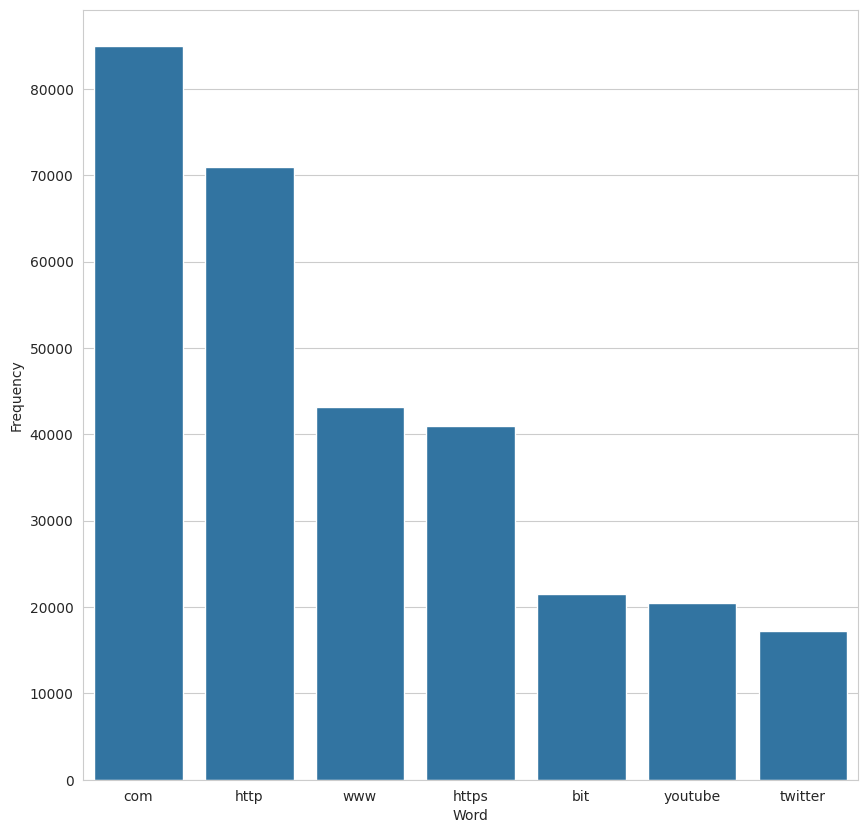

In [38]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

desc_lower = us_df['description'].str.lower().str.cat(sep=' ')

desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]

word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

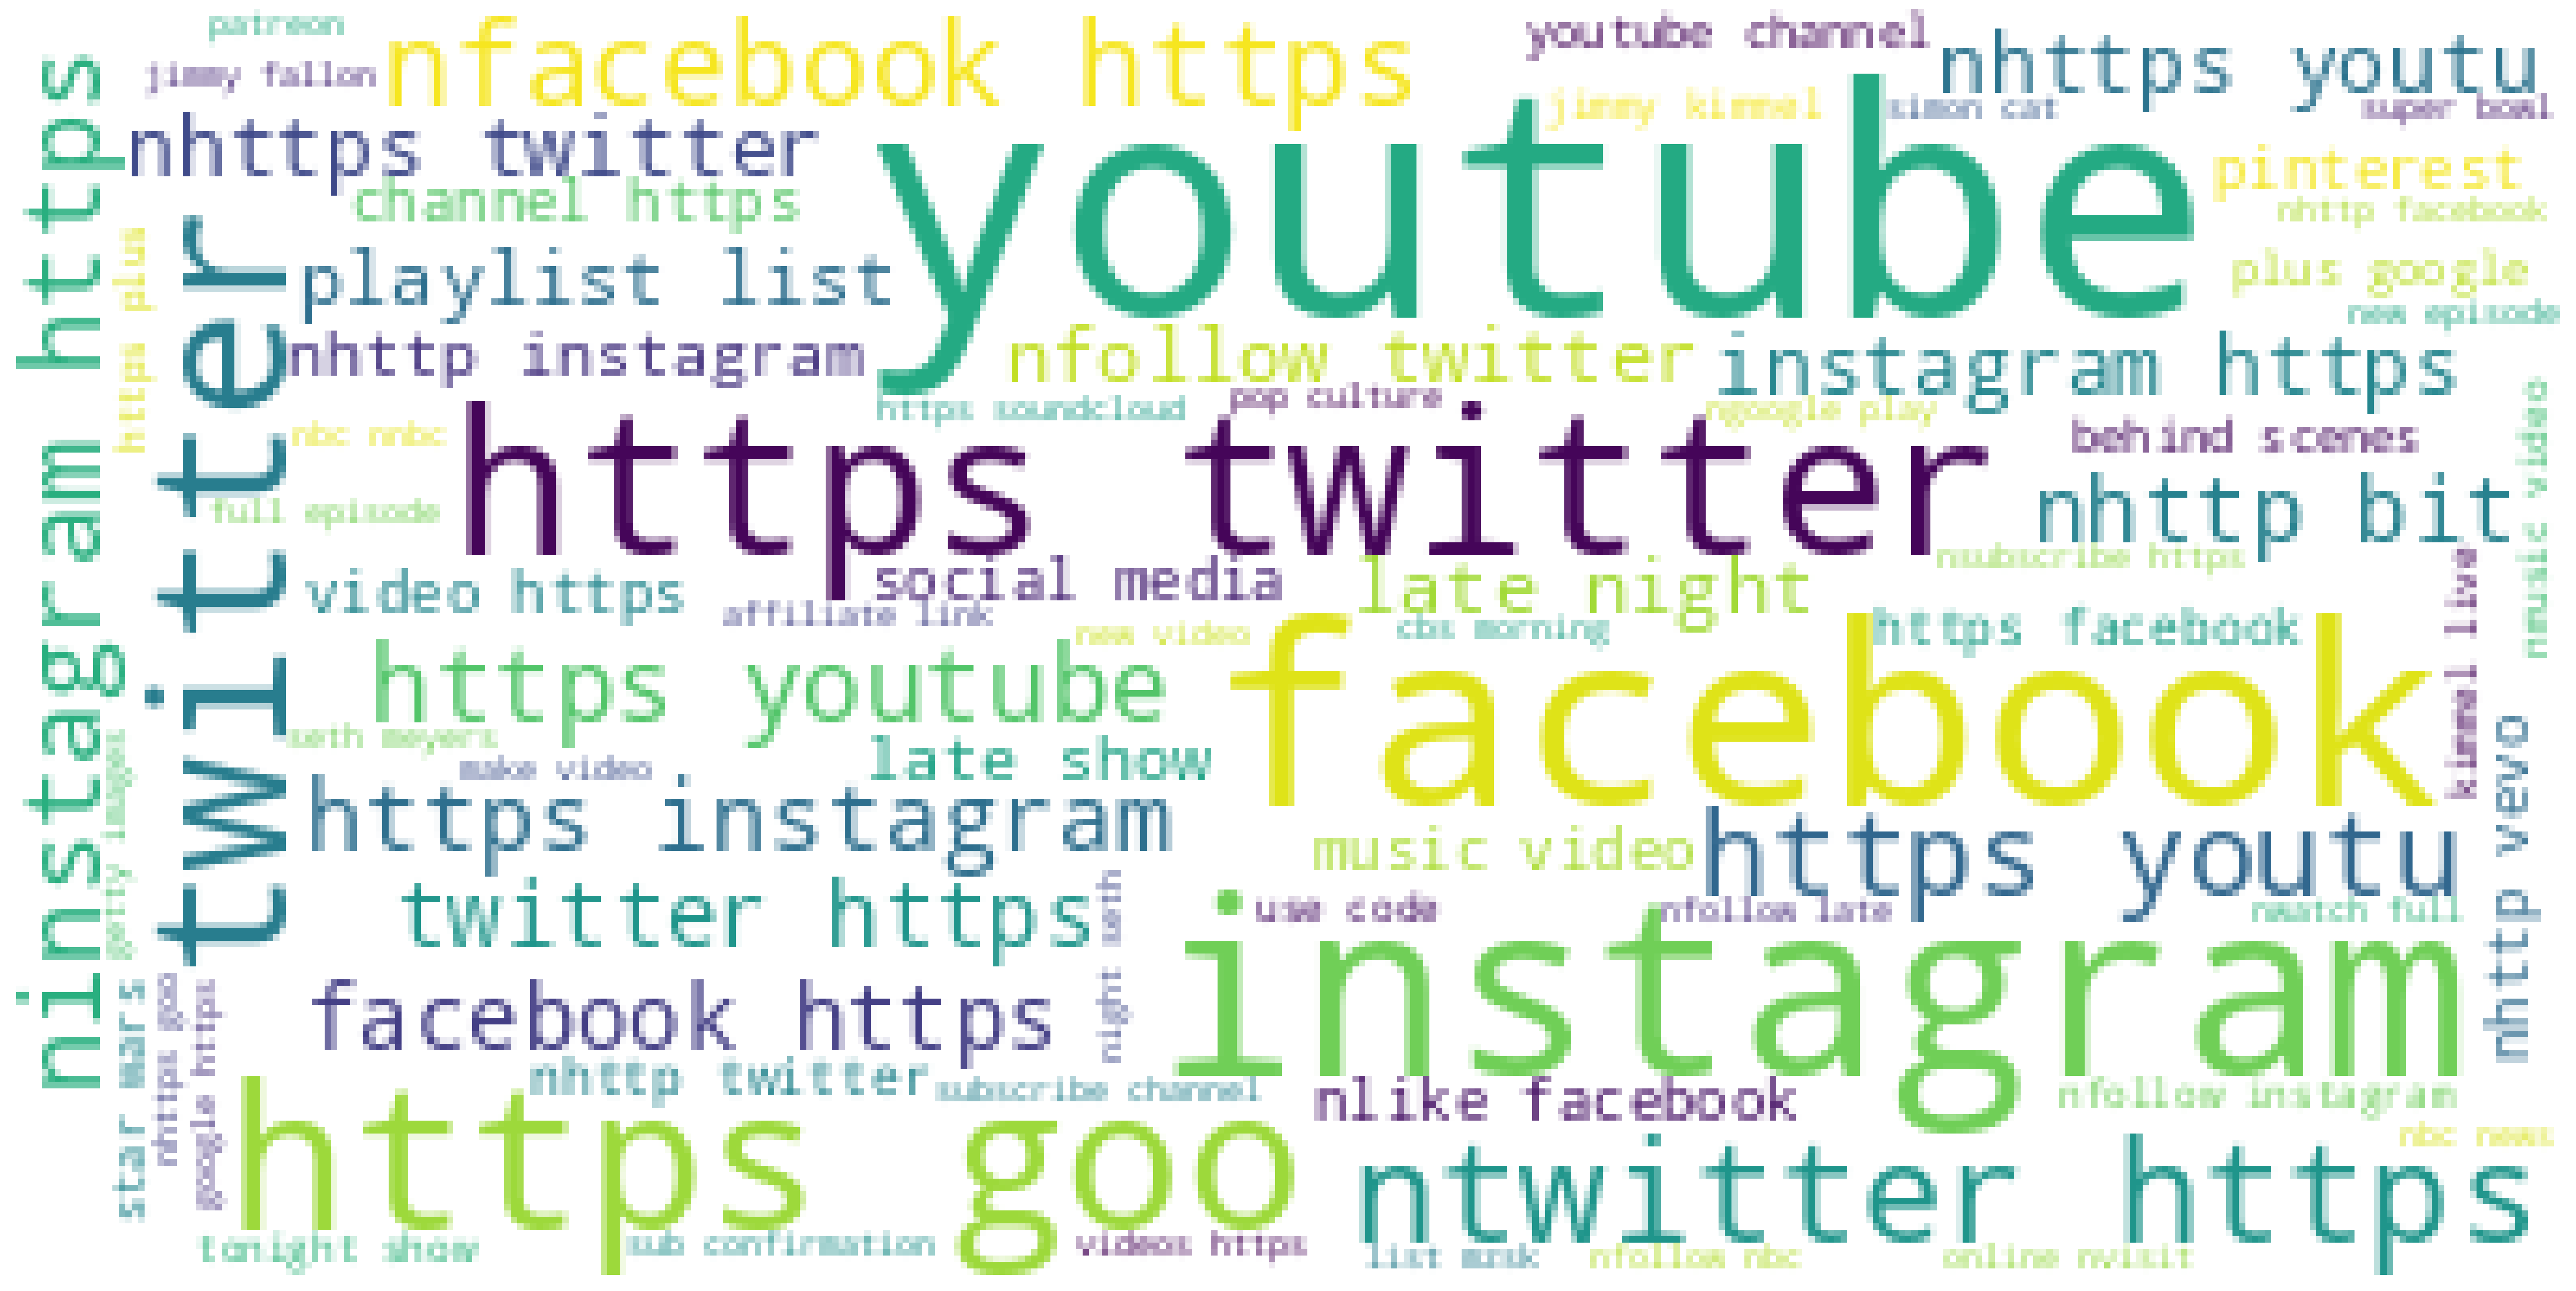

In [39]:
wc(cleaned_data_desc,'white','Frequent Words' )

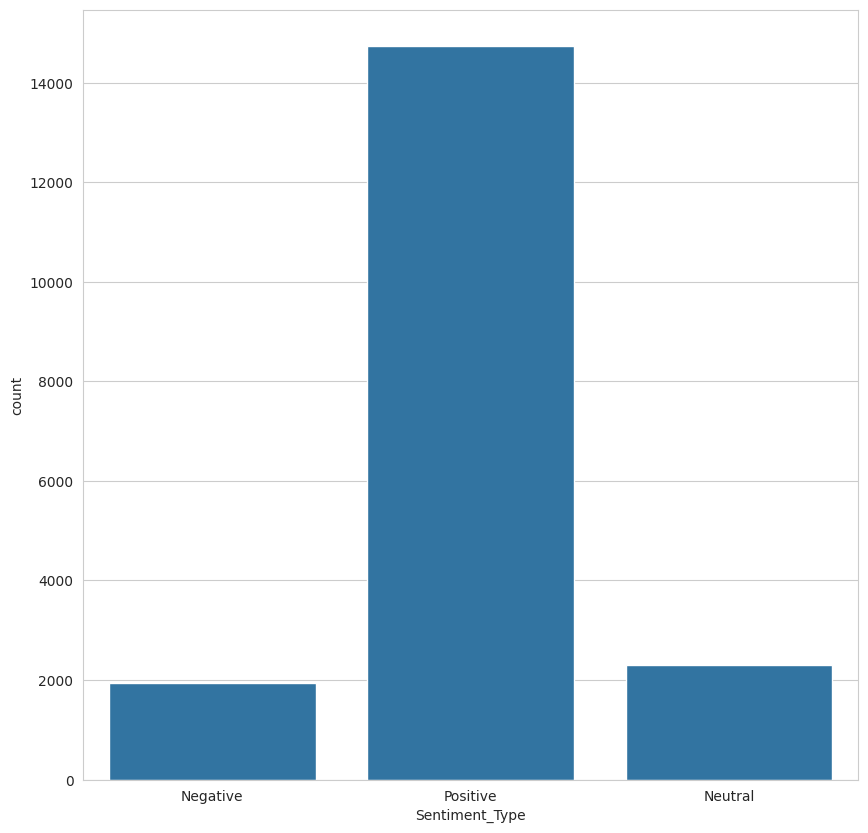

In [44]:
#Categorize the Description column into Positive and Negative sentiments using TextBlob
from textblob import TextBlob

bloblist_desc = list()

us_df_descr_str=us_df['description'].astype(str)
for row in us_df_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    us_df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

def f(us_df_polarity_desc):
    if us_df_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif us_df_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

us_df_polarity_desc['Sentiment_Type'] = us_df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=us_df_polarity_desc)

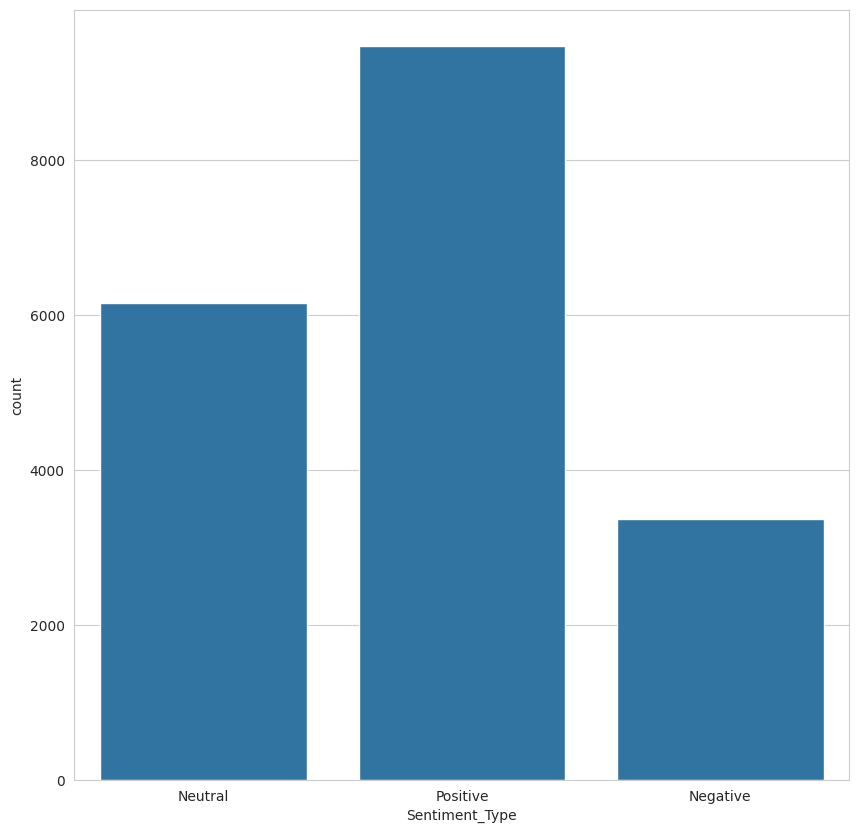

In [45]:
#Categorize the Tags column into Positive and Negative sentiments using TextBlob
from textblob import TextBlob

bloblist_tags = list()

us_df_tags_str=us_df['tags']
for row in us_df_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    us_df_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])

def f_tags(us_df_polarity_tags):
    if us_df_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif us_df_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

us_df_polarity_tags['Sentiment_Type'] = us_df_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=us_df_polarity_tags)

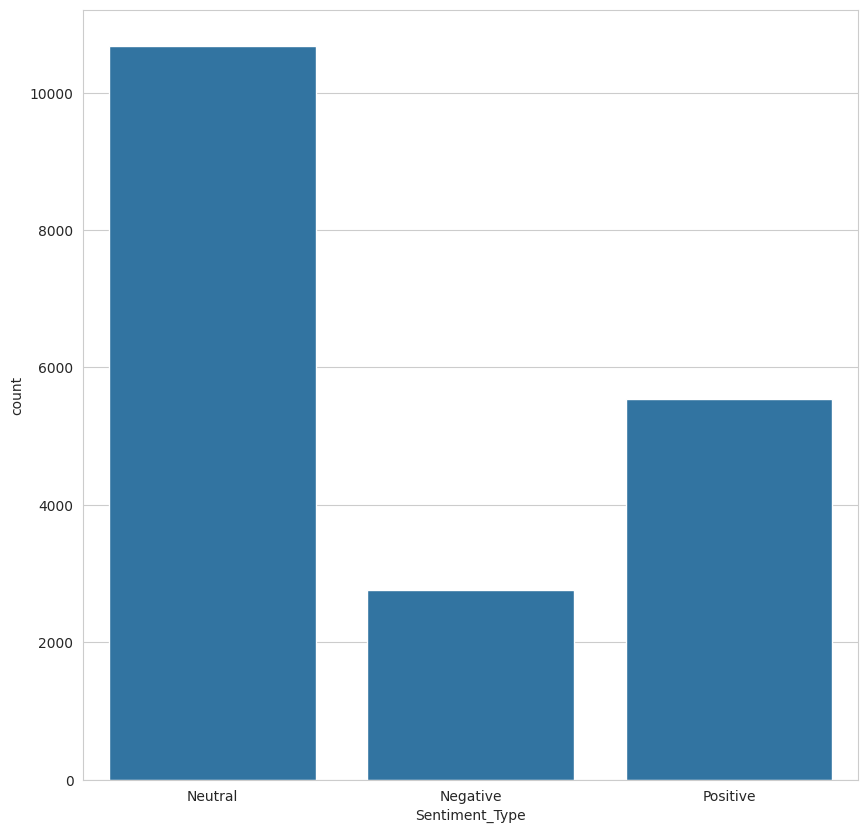

In [46]:
#Categorize the Title column into Positive and Negative sentiments using TextBlob
from textblob import TextBlob

bloblist_title = list()

us_df_title_str=us_df['title']
for row in us_df_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    us_df_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])

def f_title(us_df_polarity_title):
    if us_df_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif us_df_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

us_df_polarity_title['Sentiment_Type'] = us_df_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=us_df_polarity_title)